<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

# Цель проекта

Нужно спрогнозировать количество заказов такси в период пиковой нагрузки на следующий час. Обучить модель и довести значение метрики RMSE на тестовой выборке не больше 48.

# Описание данных

- Дата заказов находится в столбце 'datetime' 
- Количество заказов находится в столбце 'num_orders' 

## Подготовка

Импортируем все необходимые библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

Запишем данные в переменную, посмотрим на несколько строк и выведим info

In [2]:
data = pd.read_csv('/datasets/taxi.csv')

In [3]:
data.head(10)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
5,2018-03-01 00:50:00,21
6,2018-03-01 01:00:00,7
7,2018-03-01 01:10:00,5
8,2018-03-01 01:20:00,17
9,2018-03-01 01:30:00,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Проверим на дубликаты сейчас, тк в одном столбце "num_orders" их будет очень много

In [5]:
data.duplicated().sum()

0

Переведем столбец "datetime" в удобный/рабочий формат и установим как индекс датафрейма

In [6]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')

In [7]:
data = data.set_index('datetime')

Отсортируем индекс и проверим

In [8]:
data.sort_index(inplace=True)

In [9]:
data.index.is_monotonic

True

Поскольку задача стоит "предсказать на следующий час", то ресемплируем данные по "1H"

In [10]:
data = data.resample('1H').sum()

### Вывод

Мы ознакомились с датафреймом, отметили его особенности для дальнейшей работы. В ходе проверки, мы обнаружили отсутствие дубликатов, перевели столбец "datetime" и установили его как индекс датафрейма, так же отсортировали и ресемплировали данные по индексу.

## Анализ

Для анализа данных разберём их на тренды и сезонность, построим графики

In [11]:
decomposed = seasonal_decompose(data, model='additive')

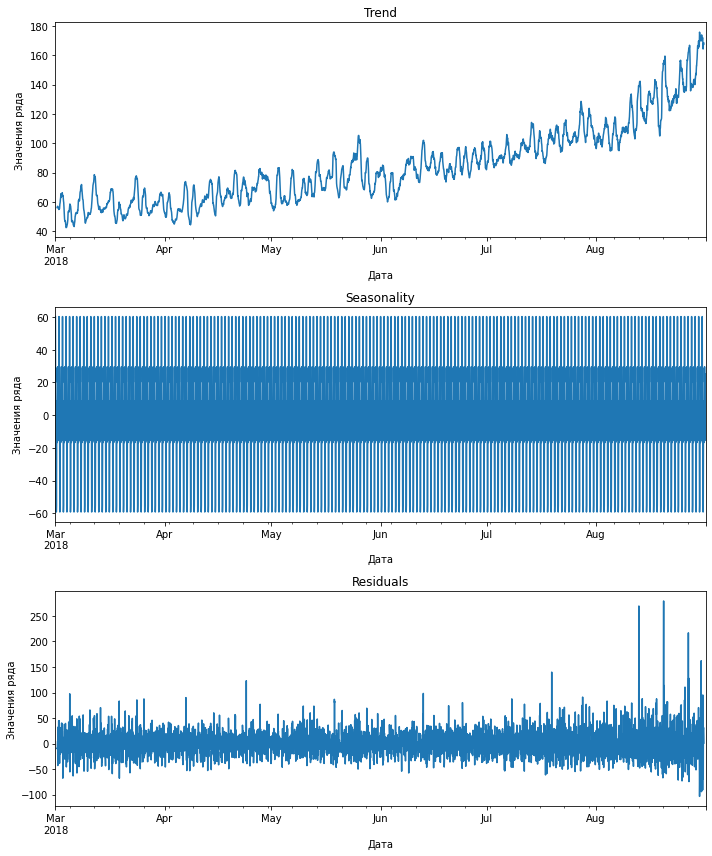

In [12]:
plt.figure(figsize=(10, 12))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.xlabel('Дата')
plt.ylabel('Значения ряда')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.xlabel('Дата')
plt.ylabel('Значения ряда')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.xlabel('Дата')
plt.ylabel('Значения ряда')
plt.tight_layout()

Видим, что растет "Trend", те в период с марта по август выросло общее количество заказов. Для анализа "Seasonality" возьмем период в неделю + 1 день.

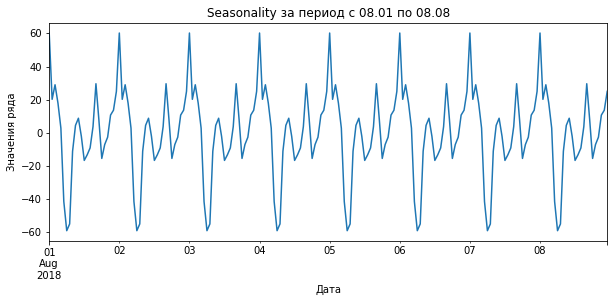

In [13]:
plt.figure(figsize=(10, 4))

decomposed.seasonal['2018-08-01':'2018-08-08'].plot(ax=plt.gca());
plt.title('Seasonality за период с 08.01 по 08.08');
plt.xlabel('Дата');
plt.ylabel('Значения ряда');

Также посмотрим какая "Seasonality" за период в месяц скомпоновав данные по одному дню

In [14]:
data_1d = data.resample('1D').sum()

In [15]:
decomposed_1d = seasonal_decompose(data_1d, model='additive')

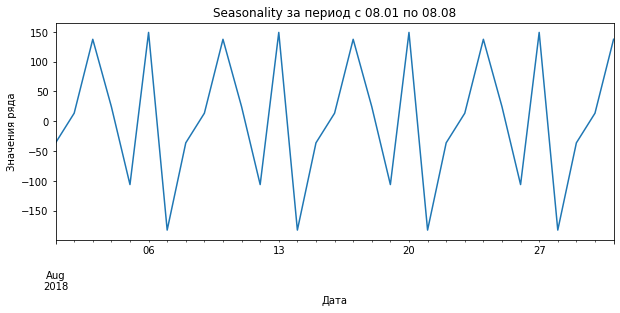

In [16]:
plt.figure(figsize=(10, 4))

decomposed_1d.seasonal['2018-08-01':'2018-08-31'].plot(ax=plt.gca());
plt.title('Seasonality за период с 08.01 по 08.08');
plt.xlabel('Дата');
plt.ylabel('Значения ряда');

### Вывод

В ходе анализа данных мы обнаружили, что в период с марта по август выросло общее количество заказов, что в течении дня "пиковые" часы приходятся на вторую половину дня, по неделям пики приходятся на понедельники и пятницы.

Изходя из полученных данных в признаки считаю необхождимым добавить столбцы по месяцу, дню недели, дню и часу

## Обучение

Перед началом обучения моделей нам необходимо сделать несколько шагов

Создадим признаки

In [17]:
data_new = data
def make_features(data_new, max_lag, rolling_mean_size):
    data_new['hour'] = data_new.index.hour
    data_new['dayofweek'] = data_new.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data_new['lag_{}'.format(lag)] = data_new['num_orders'].shift(lag)
        
    
    data['rolling_mean'] = data_new['num_orders'].shift().rolling(rolling_mean_size).mean()

Теперь созадим эти некоторое количество признаков задав max_lag и rolling_mean_size, если при обучении моделей на валидационной выборке результат метрики нас не устроит, то мы просто изменим max_lag и rolling_mean_size и посчитаем снова

ps. Значения max_lag и rolling_mean_size = 4, 10, 12 дали плохой результат на тестовой выборке.

pss. В итоге удовлетворительный результат был достигнут max_lag = 12 и rolling_mean_size = 24. Можно сделать преположение, что чем больше(точно больше 10) мы создадим признаков, тем лучше будут предсказания.

In [18]:
make_features(data_new, 2, 24)

data_new.head()

,num_orders,hour,dayofweek,lag_1,lag_2,rolling_mean
datetime,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN,NaN
2018-03-01 02:00:00,71,2,3,85.0,124.0,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,NaN
2018-03-01 04:00:00,43,4,3,66.0,71.0,NaN


Теперь разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 8:1:1, те 80, 10 и 10 в процентах

In [19]:
train, valid_test = train_test_split(data_new, test_size=0.2, random_state=5432, shuffle=False)

In [20]:
valid, test = train_test_split(valid_test, test_size=0.5, random_state=5432, shuffle=False)

Удалим пропуски из train для корректного обучения моделей

In [21]:
train = train.dropna()

Проверим как разделили данные

In [22]:
print(train.index.min(), train.index.max())
print(valid.index.min(), valid.index.max())
print(test.index.min(), test.index.max())

2018-03-02 00:00:00 2018-07-26 03:00:00
2018-07-26 04:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


Данные обучающей выборки предшествуют данным тестовой, то есть модели будут обучаться корректно

Теперь создадим переменные для признаков и целевого признака для всех 3 выборок

In [23]:
features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']

In [24]:
features_valid = valid.drop('num_orders', axis=1)
target_valid = valid['num_orders']

In [25]:
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

Теперь можем приступать к обучению моделей, мы решили обучим три модели: модели градиентного бустинга LightGBM и CatBoost и модель линейной регрессии

### LinearRegression

In [26]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)

predictions_lr = model_lr.predict(features_valid)
    
result_lr = mean_squared_error(target_valid, predictions_lr)
result_lr = result_lr ** 0.5

print('RMSE на валидационной выборке =', round(result_lr))

RMSE на валидационной выборке = 41


### CatBoost

Создадим цикл для поиска наилучшего показателя для метрики RMSE путем изменения гиперпараметров depth в диапозоне от 1 до 10 и iterations от 50 до 150 с шагом в 10 и выведим результат

In [27]:
best_model_cat = None
best_result_cat = 100
best_itera_cat = 0
best_dept_cat = 0

for itera in range(50, 151, 10):
    
    for dept in range (1, 11):
        
        model_cat = CatBoostRegressor(random_state=5432, iterations=itera, depth=dept, logging_level='Silent')
        model_cat.fit(features_train, target_train) 
        
        predictions_cat = model_cat.predict(features_valid)
        
        result_cat = mean_squared_error(target_valid, predictions_cat)
        result_cat = result_cat ** 0.5
        
        if result_cat < best_result_cat:
            
            best_model_cat = model_cat
            best_result_cat = result_cat
            best_itera_cat = itera
            best_dept_cat = dept

In [28]:
print("RMSE наилучшей модели на валидационной выборке:", round(best_result_cat),
      'с параметром depth =', best_dept_cat, 'и параметром iterations =', best_itera_cat)

RMSE наилучшей модели на валидационной выборке: 30 с параметром depth = 5 и параметром iterations = 80


### DecisionTreeRegressor

Создадим цикл для поиска наилучшего показателя для метрики RMSE путем изменения гиперпараметров max_depth

In [31]:
best_model_dtr = None
best_result_dtr = 100
best_depth_dtr = 0

for depth in range(1, 11):
    
    model_dtr = DecisionTreeRegressor(random_state=5432, max_depth=depth)
    model_dtr.fit(features_train, target_train)
    
    predictions_dtr = model_dtr.predict(features_valid)
        
    result_dtr = mean_squared_error(target_valid, predictions_dtr)
    result_dtr = result_dtr ** 0.5
    
    if result_dtr < best_result_dtr:
        
        best_model_dtr = model_dtr
        best_result_dtr = result_dtr
        best_depth_dtr = depth

In [32]:
print("RMSE наилучшей модели на валидационной выборке:", round(best_result_dtr),
      'с параметром max_depth =', best_depth_dtr)

RMSE наилучшей модели на валидационной выборке: 36 с параметром max_depth = 7


### Вывод

In [33]:
data_models = pd.DataFrame(
    [round(result_lr), round(best_result_cat), round(best_result_dtr)], 
     columns=['RMSE'], 
     index=['LinearRegression','CatBoost', 'DecisionTreeRegressor']
)
data_models

,RMSE
LinearRegression,41
CatBoost,30
DecisionTreeRegressor,36


В ходе обучения моделей нами были созданы признаки обучения, данные были разделены на обучающую, валидационную и тестовую выборки в соотношении 8:1:1, те 80, 10 и 10 в процентах, а после мы создали переменные для моделей.

Обучение моделей выявило, что наиболее точной является модель градиентного бустинга CatBoost с гиперпараметрами depth=5 и iterations=80, у DecisionTreeRegressor с гиперпараметром max_depth = 7 точность чуть ниже, но на обучение тратится значительно меньше времени, модель LinearRegression показала наихудший результат точности, но наибыстрейшую скорость работы. 

Во всех трех случаях RMSE на валидационной выборке дал результат меньше 48, что удовлетворяет поставленной задаче

Для проведения проверки на тестовых данных нами выбрана модель градиентного бустинга CatBoost с гиперпараметрами depth=5 и iterations=80.

## Тестирование

Перед тестированием наилучшей модели объеденим обучающую и валидационную в одну, чтобы данных для обучения было больше, и на ней уже обучим модель

In [34]:
features_train_valid = features_train.append(features_valid)
target_train_valid = target_train.append(target_valid)

Проверим все ли осталось на местах

In [35]:
print(features_train_valid.index.min(), features_train_valid.index.max())
print(target_train_valid.index.min(), target_train_valid.index.max())

2018-03-02 00:00:00 2018-08-13 13:00:00
2018-03-02 00:00:00 2018-08-13 13:00:00


In [36]:
features_train_valid.head()

,hour,dayofweek,lag_1,lag_2,rolling_mean
datetime,,,,,
2018-03-02 00:00:00,0,4,58.0,113.0,56.833333
2018-03-02 01:00:00,1,4,90.0,58.0,55.416667
2018-03-02 02:00:00,2,4,120.0,90.0,56.875000
2018-03-02 03:00:00,3,4,75.0,120.0,57.041667
2018-03-02 04:00:00,4,4,64.0,75.0,56.958333


In [37]:
target_train_valid.head()

datetime
2018-03-02 00:00:00     90
2018-03-02 01:00:00    120
2018-03-02 02:00:00     75
2018-03-02 03:00:00     64
2018-03-02 04:00:00     20
Freq: H, Name: num_orders, dtype: int64

Теперь проведем проверку лучшей модели на тестовой выборке

In [38]:
model_cat_best = CatBoostRegressor(random_state=5432, depth=best_dept_cat, iterations=best_itera_cat, logging_level='Silent')
model_cat_best.fit(features_train_valid, target_train_valid)

predictions_cat_best = model_cat_best.predict(features_test)

result_cat_best = mean_squared_error(target_test, predictions_cat_best)
result_cat_best = result_cat_best ** 0.5

print('RMSE на тестовой выборке =', round(result_cat_best))

RMSE на тестовой выборке = 47


Теперь сравним нашу модель на тестовой выборке с Dummy моделью

In [39]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(features_train,target_train)

predictions_dummy = dummy_model.predict(features_test)

result_dummy = mean_squared_error(target_test, predictions_dummy)
result_dummy = result_dummy ** 0.5

print('RMSE на тестовой выборке =', round(result_dummy))

RMSE на тестовой выборке = 88


### Вывод

Лучшая модель на валидационной выборке показала на тестовой выборке RMSE = 47. Проверка константной моделью показало RMSE = 88

## Общий вывод

В ходе проведения работы мы ознакомились с датафреймом, отметили его особенности для дальнейшей работы. В ходе проверки, мы обнаружили отсутствие дубликатов, перевели столбец "datetime" и установили его как индекс датафрейма, так же отсортировали и ресемплировали данные по индексу объеденив данные за час, тк это необходимо по условию задачи. 

Во время анализа данных мы проверяли трендовость и сезонность заказов, можно заключить, что в период с марта по август выросло общее количество заказов, что в течении дня "пиковые" часы приходятся на вторую половину дня, по неделям пики приходятся на понедельники и пятницы.

Перед началом обучения моделей нами были созданы признаки, частично из данных полученных при анализе, получившийся датафрейм был нами разбит на обучающую, валидационную и тестовую выборки в соотношении 8:1:1, те 80, 10 и 10 в процентах, а далее мы разделили целевой признак и признаки в этих выборках.

Обучение моделей на валидационной выборке показало, что наиболее точной является модель градиентного бустинга CatBoost с гиперпараметрами depth=5 и iterations=80, у DecisionTreeRegressor с гиперпараметром max_depth = 7 точность чуть ниже, но на обучение тратится значительно меньше времени, модель LinearRegression показала наихудший результат точности, но наибыстрейшую скорость работы.

Тест наилучшей модели показал такие результаты: RMSE = 47, что ниже порога в 48, что удовлетворяюет требованию задачи. Также мы проверили константную модель, метрика RMSE = 88, те наша модель работает точнее.

Ниже будет график факт/предсказанние чтобы посмотреть где наша модель ошибалась

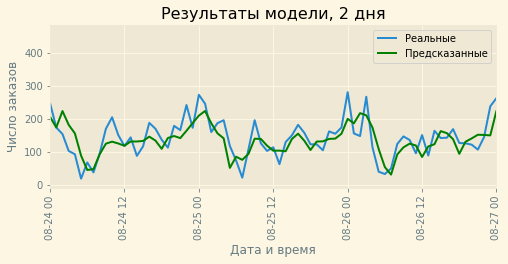

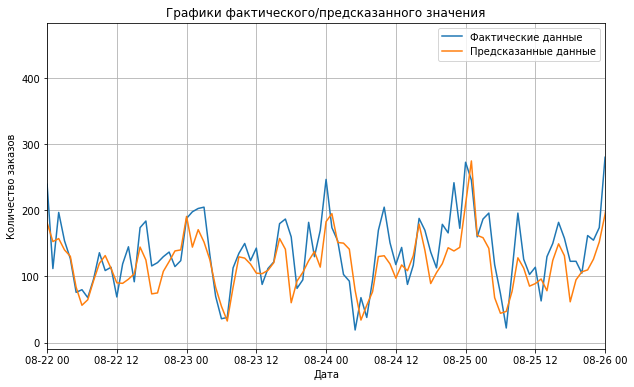

In [40]:
plt.figure(figsize=(10, 6)) ;

sns.lineplot(y=target_test, x=target_test.index, label='Фактические данные');
sns.lineplot(y=predictions_cat_best, x=target_test.index, label='Предсказанные данные');

plt.xlim([17765, 17769]);

plt.grid()
plt.xlabel('Дата');
plt.ylabel('Количество заказов');
plt.title('Графики фактического/предсказанного значения');


На графиках видно, что в целом наши предсказания немного занижены, те пики графика предсказаний ниже пиков графика фактического, но в "рисунок" на обоих графиках выглядит эквивалентно 